## Agenda:                                                                                                                                  helping  Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries



In [132]:
import pandas as pd 
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt


In [2]:
pd.reset_option("display.max_rows")


In [3]:
#df_netflix=pd.read_csv(r"E:\scalerprojects\Netflix_Data Exploration & Visualisation\netflix.csv")
df_netflix=pd.read_csv(r"C:\Users\SG\Desktop\Netflix_Data Exploration & Visualisation\netflix.csv")
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df_netflix["rating"].fillna("NOT-RATED",inplace=True)

In [6]:
df_netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df_netflix["duration"]=df_netflix["duration"].str.split(expand=True)[0]
df_netflix["duration"]=df_netflix["duration"].astype("float")

In [8]:
df_netflix["duration"] = df_netflix.groupby('type',group_keys=False)['duration'].apply(lambda x: x.fillna(x.mean()))

df_netflix["duration"]=df_netflix["duration"].astype("int")

In [9]:
df_netflix["date_added"]=pd.to_datetime(df_netflix["date_added"])

In [10]:
df_netflix["date_added"]=df_netflix["date_added"].fillna(pd.to_datetime(df_netflix["release_year"],format="%Y").dt.strftime("%Y-%m-%d"),)


In [11]:
df_netflix.loc[df_netflix["show_id"]=="s6175"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,2018-01-01,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...


 ## unnesting country col

In [12]:

x=df_netflix["country"].apply(lambda x: str(x).split(",")).to_list()
x


[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  ' Ghana',
  ' Burkina Faso',
  ' United Kingdom',
  ' Germany',
  ' Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['nan'],
 ['nan'],
 ['Germany', ' Czech Republic'],
 ['nan'],
 ['nan'],
 ['United States'],
 ['nan'],
 ['Mexico'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Turkey'],
 ['nan'],
 ['nan'],
 ['India'],
 ['Australia'],
 ['nan'],
 ['United States'],
 ['United States'],
 ['United States', ' India', ' France'],
 ['nan'],
 ['nan'],
 ['United Kingdom'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Finland'],
 ['China', ' Canada', ' United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['nan'],
 ['South Africa', ' United States', ' Japan'],
 ['nan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['J

In [13]:
df1=pd.DataFrame(x,index=df_netflix["title"])
df1

,0,1,2,3,4,5,6,7,8,9,10,11
title,,,,,,,,,,,,
Dick Johnson Is Dead,United States,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Ganglands,nan,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,United States,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None
Zombieland,United States,None,None,None,None,None,None,None,None,None,None,None


In [14]:
df1=df1.stack()

In [15]:
df1

title                   
Dick Johnson Is Dead   0    United States
Blood & Water          0     South Africa
Ganglands              0              nan
Jailbirds New Orleans  0              nan
Kota Factory           0            India
                                ...      
Zodiac                 0    United States
Zombie Dumb            0              nan
Zombieland             0    United States
Zoom                   0    United States
Zubaan                 0            India
Length: 10850, dtype: object

In [16]:
df1=pd.DataFrame(df1.reset_index())


In [17]:
df1

,title,level_1,0
0,Dick Johnson Is Dead,0,United States
1,Blood & Water,0,South Africa
2,Ganglands,0,nan
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,India
...,...,...,...
10845,Zodiac,0,United States
10846,Zombie Dumb,0,nan
10847,Zombieland,0,United States
10848,Zoom,0,United States


In [18]:
df1[0].value_counts()

United States     3211
India             1008
nan                831
United Kingdom     628
 United States     479
                  ... 
 Ecuador             1
Iran                 1
Cyprus               1
 Mongolia            1
 Montenegro          1
Name: 0, Length: 198, dtype: int64

In [19]:
df1[0].unique()

array(['United States', 'South Africa', 'nan', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Leban

In [20]:
df1.isna().sum()

title      0
level_1    0
0          0
dtype: int64

In [21]:
df1.drop(columns=["level_1"],inplace=True)

In [22]:
df1.rename(columns={0:"country"},inplace=True)

In [23]:
df2=df_netflix.merge(df1,how="inner",on="title")

In [24]:
df2

,show_id,type,title,director,cast,country_x,date_added,release_year,rating,duration,listed_in,description,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,nan
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",nan
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
10846,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",nan
10847,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
10848,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


In [25]:
df2["country_y"].unique()

array(['United States', 'South Africa', 'nan', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Leban

In [26]:
df2.drop(columns=["country_x"],inplace=True)

In [27]:
df2["country_y"]=df2["country_y"].str.strip()

In [28]:
df2["country_y"].dtype

dtype('O')

In [29]:
#pd.set_option("display.max_rows",None)
df2["country_y"].value_counts()

United States     3690
India             1046
nan                831
United Kingdom     806
Canada             445
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country_y, Length: 124, dtype: int64

In [30]:
#df2['country_y'].fillna(df2['country_y'].mode()[0],inplace=True)
df2["country_y"].replace("nan","United States", inplace=True)
df2["country_y"].replace("","United States", inplace=True)


In [31]:
df2["country_y"].value_counts()

United States     4528
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country_y, Length: 122, dtype: int64

In [32]:
df2.groupby(["title","country_y"])["director"].value_counts().to_frame()

,,,director
title,country_y,director,
#Alive,South Korea,Cho Il,1
#AnneFrank - Parallel Stories,Italy,"Sabina Fedeli, Anna Migotto",1
#FriendButMarried,Indonesia,Rako Prijanto,1
#FriendButMarried 2,Indonesia,Rako Prijanto,1
#Roxy,Canada,Michael Kennedy,1
...,...,...,...
​Maj Rati ​​Keteki,India,Santwana Bardoloi,1
​Mayurakshi,India,Atanu Ghosh,1
​​Kuch Bheege Alfaaz,India,Onir,1


In [33]:
df2.groupby(["title","country_y"])["director"].agg(pd.Series.mode)

title                          country_y    
#Alive                         South Korea                           Cho Il
#AnneFrank - Parallel Stories  Italy            Sabina Fedeli, Anna Migotto
#FriendButMarried              Indonesia                      Rako Prijanto
#FriendButMarried 2            Indonesia                      Rako Prijanto
#Roxy                          Canada                       Michael Kennedy
                                                           ...             
忍者ハットリくん                       Japan                                     []
海的儿子                           United States                             []
마녀사냥                           South Korea                               []
반드시 잡는다                        South Korea                    Hong-seon Kim
최강전사 미니특공대 : 영웅의 탄생            United States                  Young Jun Lee
Name: director, Length: 10849, dtype: object

In [34]:
#df2["direct_new"] = df2.groupby(["title","country_y"])['director'].apply(lambda x: x.fillna(x.mode()))

In [35]:
df2

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10845,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",United States
10846,s8804,TV Show,Zombie Dumb,NaN,NaN,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",United States
10847,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,United States
10848,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States


In [36]:
#df2["direct_new"].isna().sum() 

In [37]:
df2["country_y"].value_counts().to_frame()

,country_y
United States,4528
India,1046
United Kingdom,806
Canada,445
France,393
...,...
Bermuda,1
Ecuador,1
Armenia,1
Mongolia,1


In [38]:
#def custom(x):
 #   x["director_new"]=x["director"].mode()
  #  return x
    

In [39]:
#df3=df2.groupby(["country_x"]).apply(custom)

In [40]:
#df3["director_new"].unique()

In [41]:
df2.isna().sum()

show_id            0
type               0
title              0
director        2970
cast            1006
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
country_y          0
dtype: int64

In [42]:
#df2.groupby(["country_y"])["director"]



## unnesting of listed_in col

In [43]:
y=df2["listed_in"].apply(lambda x: str(x).split(",")).to_list()
y

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movie

In [44]:
df4=pd.DataFrame(y,index=df2["title"])
df4

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
Jailbirds New Orleans,Docuseries,Reality TV,None
Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
Zodiac,Cult Movies,Dramas,Thrillers
Zombie Dumb,Kids' TV,Korean TV Shows,TV Comedies
Zombieland,Comedies,Horror Movies,None


In [45]:
df4=df4.stack()


In [46]:
df4

title                  
Dick Johnson Is Dead  0               Documentaries
Blood & Water         0      International TV Shows
                      1                   TV Dramas
                      2                TV Mysteries
Ganglands             0              Crime TV Shows
                                     ...           
Zoom                  0    Children & Family Movies
                      1                    Comedies
Zubaan                0                      Dramas
                      1        International Movies
                      2            Music & Musicals
Length: 23764, dtype: object

In [47]:
df4=pd.DataFrame(df4.reset_index())
df4

,title,level_1,0
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Ganglands,0,Crime TV Shows
...,...,...,...
23759,Zoom,0,Children & Family Movies
23760,Zoom,1,Comedies
23761,Zubaan,0,Dramas
23762,Zubaan,1,International Movies


In [48]:
df4.drop(columns=["level_1"],inplace=True)

In [49]:
df4.rename(columns={0:"listed_in"},inplace=True)

In [50]:
df_listed=df2.merge(df4,how="inner",on="title")

In [51]:
df_listed

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in_x,description,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37827,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,Children & Family Movies
37828,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",United States,Comedies
37829,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,Dramas
37830,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,India,International Movies


In [52]:
df_listed.drop(columns=["listed_in_x"],inplace=True)

In [53]:
df_listed["listed_in_y"]=df_listed["listed_in_y"].str.strip()

In [54]:
df_listed["listed_in_y"].value_counts()

International Movies            6175
Dramas                          5722
Comedies                        2839
Action & Adventure              2136
Documentaries                   2066
Independent Movies              2020
International TV Shows          1777
Thrillers                       1530
Children & Family Movies        1447
TV Dramas                       1094
Kids' TV                        1042
Romantic Movies                 1020
Sci-Fi & Fantasy                 816
TV Comedies                      792
Crime TV Shows                   729
Horror Movies                    728
Docuseries                       588
Music & Musicals                 555
British TV Shows                 520
Romantic TV Shows                422
Sports Movies                    403
Stand-Up Comedy                  346
Reality TV                       320
TV Action & Adventure            294
Spanish-Language TV Shows        274
Classic Movies                   246
Anime Series                     228
K

In [55]:
#pd.set_option("display.max_rows",None)

df_listed.groupby(["listed_in_y"])['director'].agg(pd.Series.mode).to_frame()

,director
listed_in_y,
Action & Adventure,Martin Campbell
Anime Features,Toshiya Shinohara
Anime Series,Jay Oliva
British TV Shows,Alastair Fothergill
Children & Family Movies,"[Aaron Woodley, Nora Twomey]"
Classic & Cult TV,Phil Sgriccia
Classic Movies,"[David Lean, Jane Campion]"
Comedies,Aaron Woodley
Crime TV Shows,"[Cecilia Peck, Justin Webster]"


## UNESTING OF CAST COL

In [56]:
z=df_listed["cast"].apply(lambda x: str(x).split(",")).to_list()
z

[['nan'],
 ['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Ci

In [57]:
df5=pd.DataFrame(z,index=df_listed["title"])
df5

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoom,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None
Zoom,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None
Zubaan,Vicky Kaushal,Sarah-Jane Dias,Raaghav Chanana,Manish Chaudhary,Meghna Malik,Malkeet Rauni,Anita Shabdish,Chittaranjan Tripathy,None,None,...,None,None,None,None,None,None,None,None,None,None


In [58]:
df5=df5.stack()

In [59]:
df5

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 298925, dtype: object

In [60]:
df5=pd.DataFrame(df5.reset_index())
df5

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
298920,Zubaan,3,Manish Chaudhary
298921,Zubaan,4,Meghna Malik
298922,Zubaan,5,Malkeet Rauni
298923,Zubaan,6,Anita Shabdish


In [61]:
df5.drop(columns=["level_1"],inplace=True)

In [62]:
df5.rename(columns={0:"cast"},inplace=True)

In [63]:
df_cast=df_listed.merge(df5,how="inner",on="title")

In [64]:
df_cast

,show_id,type,title,director,cast_x,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976672,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary
5976673,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik
5976674,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni
5976675,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish


In [65]:
df_cast.drop(columns=["cast_x"],inplace=True)

In [66]:
df_cast["cast_y"]=df_cast["cast_y"].str.strip()

In [67]:
df_cast["cast_y"].value_counts()


nan                           165268
Justin Fletcher                40101
Kate Harbour                   40101
John Sparkes                   40098
Richard Webber                 37593
                               ...  
Miranda Scarlett Schneider         1
Jamie Lissow                       1
Patricia Schneider                 1
Nicole Provost                     1
Warren Rusher                      1
Name: cast_y, Length: 36440, dtype: int64

In [68]:
df_cast["cast_y"].replace("nan",np.nan,inplace=True)

In [69]:
df_cast.isna().sum()

show_id              0
type                 0
title                0
director        782907
date_added           0
release_year         0
rating               0
duration             0
description          0
country_y            0
listed_in_y          0
cast_y          165268
dtype: int64

In [70]:
df_cast

,show_id,type,title,director,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,NaN
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata
2,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...
5976672,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary
5976673,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik
5976674,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni
5976675,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish


In [71]:
df_cast.drop_duplicates(inplace=True,ignore_index=True)
df_cast

,show_id,type,title,director,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,NaN
1,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata
2,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...
186386,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary
186387,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik
186388,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni
186389,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish


In [72]:
df_cast["cast_y"].value_counts()

Anupam Kher           127
Shah Rukh Khan        108
David Attenborough     99
Naseeruddin Shah       97
Akshay Kumar           88
                     ... 
Roy Choi                1
Ron Moody               1
Tyler Crumley           1
Mac Davis               1
Michael Salmon          1
Name: cast_y, Length: 36439, dtype: int64

In [73]:
#df_cast.loc[df_cast["title"]=="Shaun the Sheep: The Farmer’s Llamas"]

In [74]:
#df_cast.loc[df_cast["cast_y"]=="Justin Fletcher"]

In [75]:
#df_cast.loc[df_cast["cast_y"]=="Justin Fletcher"].value_counts().to_frame()

In [76]:
#def custom_d(x):
 #   x["director_new"]=x["director"].mode()
  #  return x
    

In [77]:
#df_new=df_cast.groupby(["listed_in_y"]).apply(custom_d)

In [78]:
#df_new

In [79]:
#df_cast.groupby("listed_in_y")["director"].agg(pd.Series.mode).to_frame()

In [80]:
#pd.set_option("display.max_rows",None)

#mode_dictionary=df_cast.groupby("country_y")["director"].agg(pd.Series.mode).to_dict()
#mode_dictionary

In [81]:
#df_cast["directors_mode"] = df_cast["country_y"].map(mode_dictionary)
#df_cast["directors_mode"].replace([],np.nan)
#df_cast["directors_mode"]

In [82]:
#df_cast["director"].fillna(df_cast["directors_mode"],inplace=True)

In [83]:
#df_cast["director"].value_counts()

## handling missing value for director col

In [84]:
df_cast["mode_director"] = df_cast.groupby(["listed_in_y"])['director'].apply(lambda x: x.fillna(x.mode().iloc[0]))

C:\Users\SG\AppData\Local\Temp\ipykernel_2656\2362276854.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_cast["mode_director"] = df_cast.groupby(["listed_in_y"])['director'].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [85]:
#df_cast["d12"] = df_cast.groupby(["rating"])['director'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [86]:
#pd.set_option("display.max_rows",None)

#df_cast["d12"].value_counts()

In [87]:
df_cast.isna().sum()

show_id              0
type                 0
title                0
director         50643
date_added           0
release_year         0
rating               0
duration             0
description          0
country_y            0
listed_in_y          0
cast_y            1847
mode_director        0
dtype: int64

In [88]:
df_cast["director"].fillna(df_cast["mode_director"],inplace=True)

In [89]:
#pd.set_option("display.max_rows",None)
df_cast.head(1000)

,show_id,type,title,director,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y,mode_director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,NaN,Kirsten Johnson
1,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
2,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Khosi Ngema,Noam Murro
3,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Gail Mabalane,Noam Murro
4,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Thabang Molaba,Noam Murro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,s43,Movie,Jaws 2,Jeannot Szwarc,2021-09-16,1978,PG,116,Four years after the last deadly shark attacks...,United States,Dramas,Collin Wilcox Paxton,Jeannot Szwarc
996,s43,Movie,Jaws 2,Jeannot Szwarc,2021-09-16,1978,PG,116,Four years after the last deadly shark attacks...,United States,Dramas,Ann Dusenberry,Jeannot Szwarc
997,s43,Movie,Jaws 2,Jeannot Szwarc,2021-09-16,1978,PG,116,Four years after the last deadly shark attacks...,United States,Dramas,Mark Gruner,Jeannot Szwarc
998,s43,Movie,Jaws 2,Jeannot Szwarc,2021-09-16,1978,PG,116,Four years after the last deadly shark attacks...,United States,Dramas,Barry Coe,Jeannot Szwarc


In [90]:
#df_cast["cast_y"].replace("nan",np.nan,inplace=True)

In [91]:
#df_cast.groupby(["d12"])['cast_y'].agg(pd.Series.mode).to_frame()

In [92]:
df_cast.drop("mode_director",axis=1,inplace=True)
df_cast

,show_id,type,title,director,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,NaN
1,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata
2,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Khosi Ngema
3,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Gail Mabalane
4,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...
186386,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary
186387,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik
186388,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni
186389,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish


## unnesting of director col 

In [93]:
alpha=df_cast["director"].apply(lambda x: str(x).split(",")).to_list()
alpha

[['Kirsten Johnson'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Noam Murro'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïla Marrakchi', ' Alan Poul'],
 ['Damien Chazelle', ' Houda Benyamina', ' Laïl

In [94]:
df6=pd.DataFrame(alpha,index=df_cast["title"])
df6

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Noam Murro,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Noam Murro,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Noam Murro,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Noam Murro,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zubaan,Mozez Singh,None,None,None,None,None,None,None,None,None,None,None,None
Zubaan,Mozez Singh,None,None,None,None,None,None,None,None,None,None,None,None
Zubaan,Mozez Singh,None,None,None,None,None,None,None,None,None,None,None,None


In [95]:
df6=df6.stack()

In [96]:
df6

title                  
Dick Johnson Is Dead  0    Kirsten Johnson
Blood & Water         0         Noam Murro
                      0         Noam Murro
                      0         Noam Murro
                      0         Noam Murro
                                ...       
Zubaan                0        Mozez Singh
                      0        Mozez Singh
                      0        Mozez Singh
                      0        Mozez Singh
                      0        Mozez Singh
Length: 225342, dtype: object

In [97]:
df6=pd.DataFrame(df6.reset_index())
df6

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,Noam Murro
2,Blood & Water,0,Noam Murro
3,Blood & Water,0,Noam Murro
4,Blood & Water,0,Noam Murro
...,...,...,...
225337,Zubaan,0,Mozez Singh
225338,Zubaan,0,Mozez Singh
225339,Zubaan,0,Mozez Singh
225340,Zubaan,0,Mozez Singh


In [98]:
df6.drop(columns=["level_1"],inplace=True)

In [99]:
df6.rename(columns={0:"director"},inplace=True)

In [100]:
df_final=df_cast.merge(df6,how="inner",on="title")

In [101]:
df_final

,show_id,type,title,director_x,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,NaN,Kirsten Johnson
1,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
2,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
3,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
4,s2,TV Show,Blood & Water,Noam Murro,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9487862,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Chittaranjan Tripathy,Mozez Singh
9487863,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Chittaranjan Tripathy,Mozez Singh
9487864,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Chittaranjan Tripathy,Mozez Singh
9487865,s8807,Movie,Zubaan,Mozez Singh,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Chittaranjan Tripathy,Mozez Singh


In [102]:
df_final.drop(columns=["director_x"],inplace=True)

In [103]:
df_final["director_y"]=df_final["director_y"].str.strip()

In [104]:
df_final["director_y"].value_counts()

Noam Murro         563619
Houda Benyamina    365776
Damien Chazelle    364480
Laïla Marrakchi    364480
Alan Poul          364480
                    ...  
Richard Miron           1
Lee Fulkerson           1
Leslye Davis            1
Bob Rose                1
Kirsten Johnson         1
Name: director_y, Length: 4993, dtype: int64

In [105]:
df_final.drop_duplicates(inplace=True,ignore_index=True)
df_final

,show_id,type,title,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y,director_y
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,Documentaries,NaN,Kirsten Johnson
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Damien Chazelle
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Houda Benyamina
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Laïla Marrakchi
...,...,...,...,...,...,...,...,...,...,...,...,...
335343,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary,Mozez Singh
335344,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik,Mozez Singh
335345,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni,Mozez Singh
335346,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish,Mozez Singh


In [106]:
df_final.isna().sum()

show_id            0
type               0
title              0
date_added         0
release_year       0
rating             0
duration           0
description        0
country_y          0
listed_in_y        0
cast_y          3080
director_y         0
dtype: int64

# dropping null values for cast col because its like 0.9 % only  whi

In [107]:
df_final.dropna(inplace=True)

In [108]:
df_final


,show_id,type,title,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y,director_y
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Damien Chazelle
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Houda Benyamina
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Laïla Marrakchi
5,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Alan Poul
...,...,...,...,...,...,...,...,...,...,...,...,...
335343,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary,Mozez Singh
335344,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik,Mozez Singh
335345,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni,Mozez Singh
335346,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish,Mozez Singh


## visualization 

<Axes: xlabel='type', ylabel='count'>

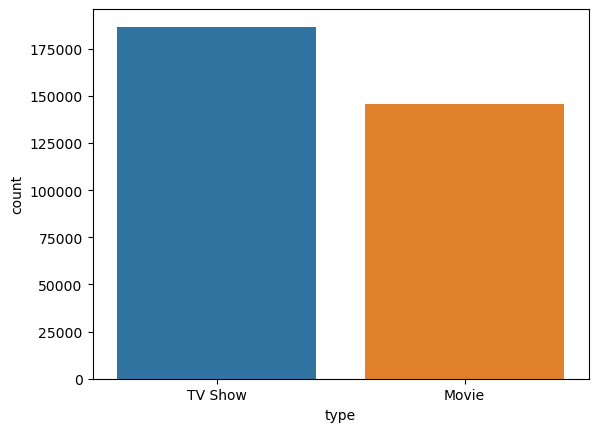

In [109]:
sns.countplot(x='type',data=df_final)



In [110]:
data=df_final.groupby("type")["title"].nunique()
data=data.reset_index()


In [111]:
data

,type,title
0,Movie,5656
1,TV Show,2326


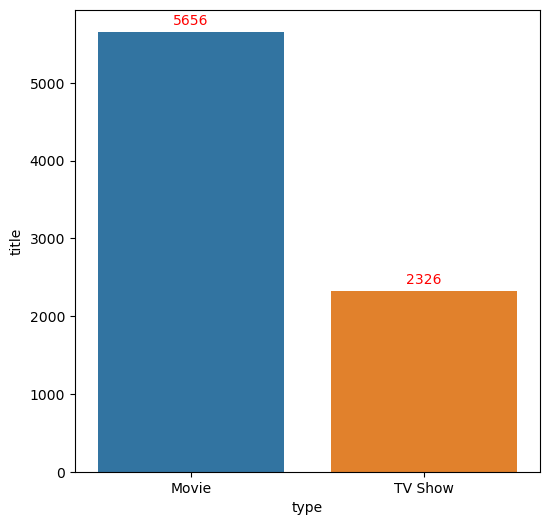

In [112]:
plt.figure(figsize=(6,6))
ax=sns.barplot(x=data["type"],y=data["title"])
ax.bar_label(ax.containers[0], label_type='edge', color='red', fontsize=10, padding=3)
plt.show()

Text(0.5, 1.0, 'Rating')

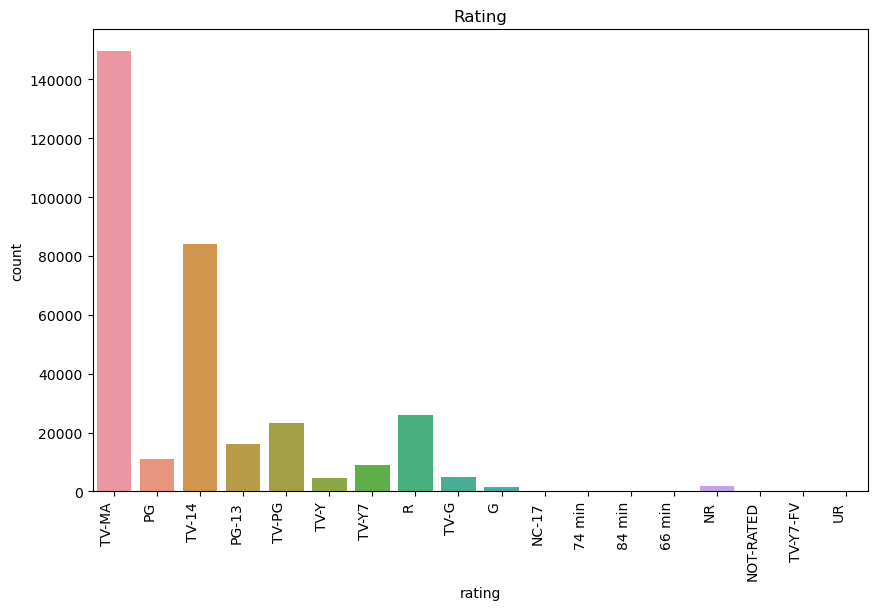

In [113]:
sns.countplot(x="rating",data=df_final)
sns.countplot(x="rating",data=df_final).set_xticklabels(sns.countplot(x="rating",data=df_final).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Rating')

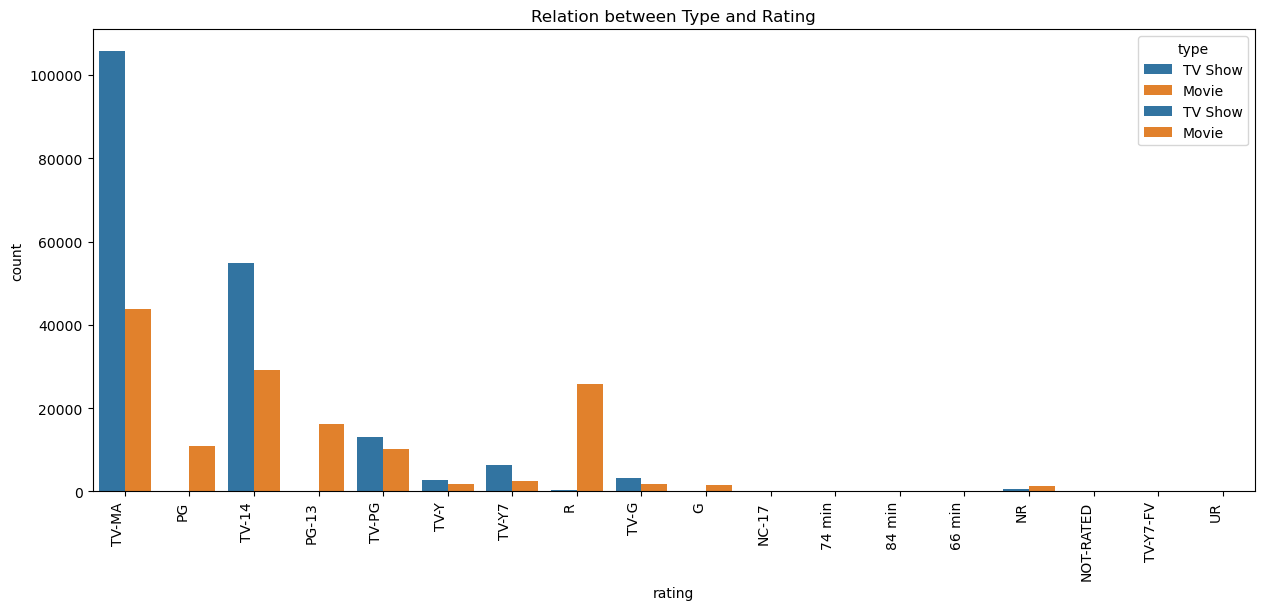

In [114]:
plt.figure(figsize=(15,6))
sns.countplot(x='rating',hue='type',data=df_final).set_xticklabels(sns.countplot(x="rating",hue='type',data=df_final).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
plt.title('Relation between Type and Rating')
plt.show()

Text(0.5, 1.0, 'Top 10 Countries Content On Netflix')

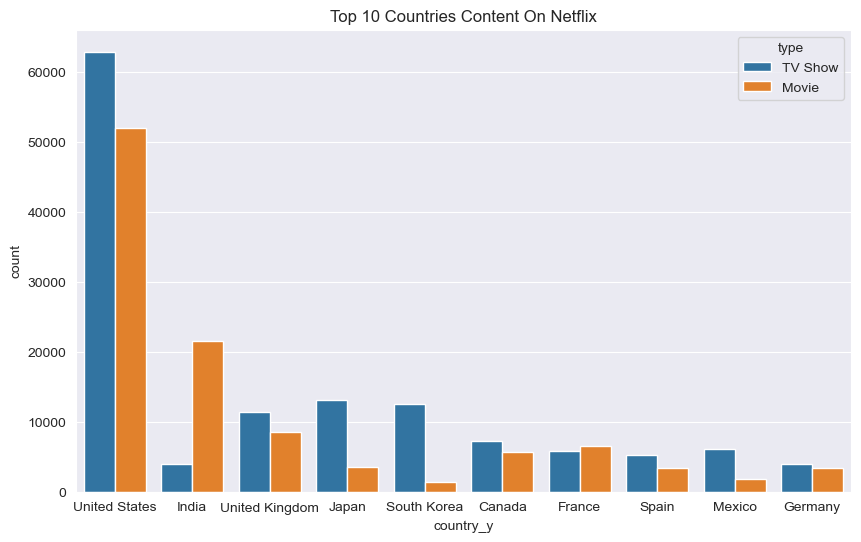

In [115]:
plt.figure(figsize =(10,6))
sns.set_style("darkgrid")
sns.countplot(x="country_y", order = df_final["country_y"].value_counts().index[0:10],hue = "type",data = df_final)
plt.title("Top 10 Countries Content On Netflix")

C:\Users\SG\AppData\Local\Temp\ipykernel_2656\2432346593.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  d=sns.distplot(df_final['release_year'])


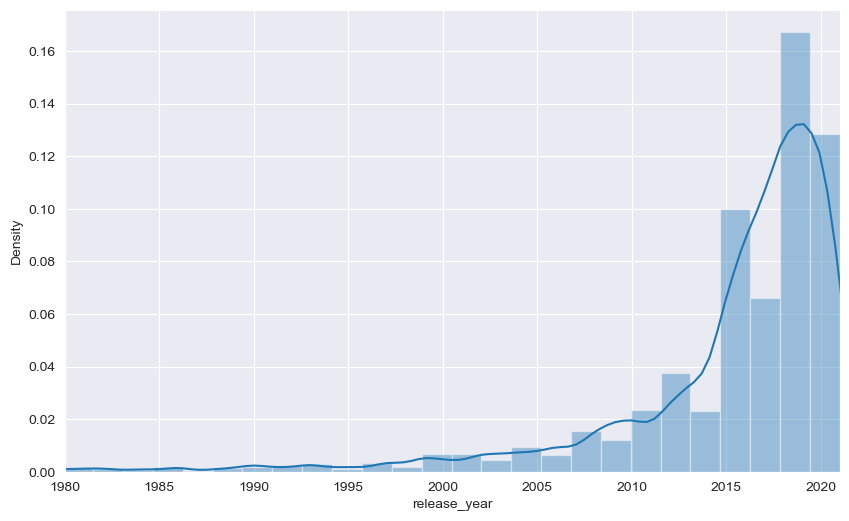

In [116]:
plt.figure(figsize =(10,6))
d=sns.distplot(df_final['release_year'])
d.set_xlim(1980,2021)
plt.show()

Text(0.5, 1.0, 'movies/ TV shows across the released_years')

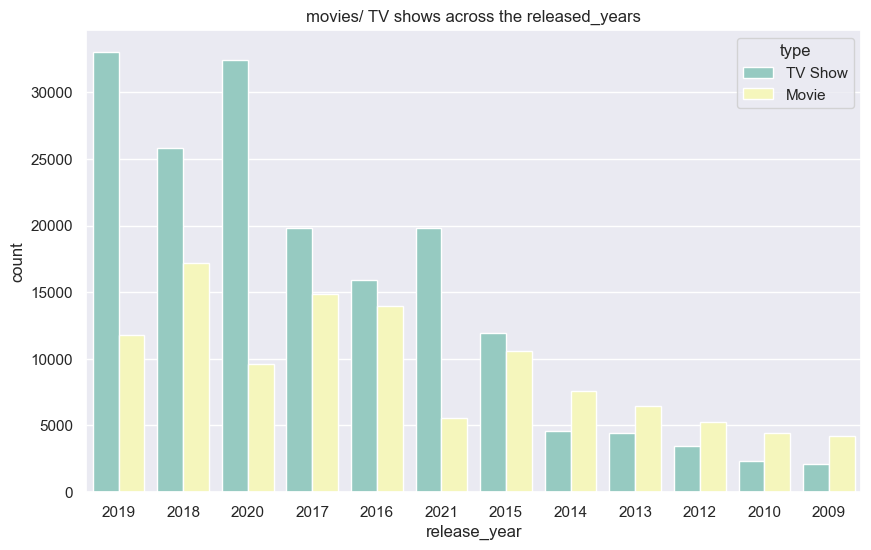

In [147]:
plt.figure(figsize =(10,6))
sns.set_style("darkgrid")
sns.countplot(x="release_year", order = df_final["release_year"].value_counts().index[0:12],hue = "type",data = df_final)
plt.title("movies/ TV shows across the released_years")


Text(0.5, 1.0, 'Top 10 directors On Netflix')

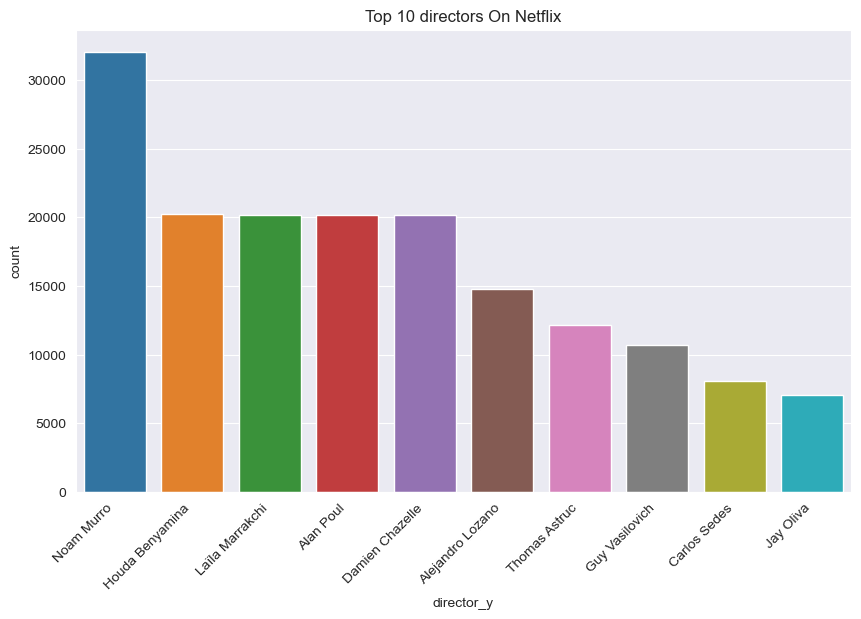

In [118]:
plt.figure(figsize =(10,6))
sns.set_style("darkgrid")
sns.countplot(x="director_y", order = df_final["director_y"].value_counts().index[0:10],data = df_final)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 directors On Netflix")


In [119]:
data=df_final.groupby("director_y")["title"].nunique()
data=data.reset_index()


In [120]:
data.sort_values(by='title', ascending=False,inplace=True)

In [121]:
d1=data.head(10)
d1

,director_y,title
3052,Noam Murro,1225
1580,Houda Benyamina,698
2368,Laïla Marrakchi,697
129,Alan Poul,697
886,Damien Chazelle,697
4157,Thomas Astruc,549
1479,Guy Vasilovich,519
143,Alejandro Lozano,441
673,Carlos Sedes,330
1771,Jay Oliva,222


Text(0.5, 1.0, 'Top 10 directors On Netflix')

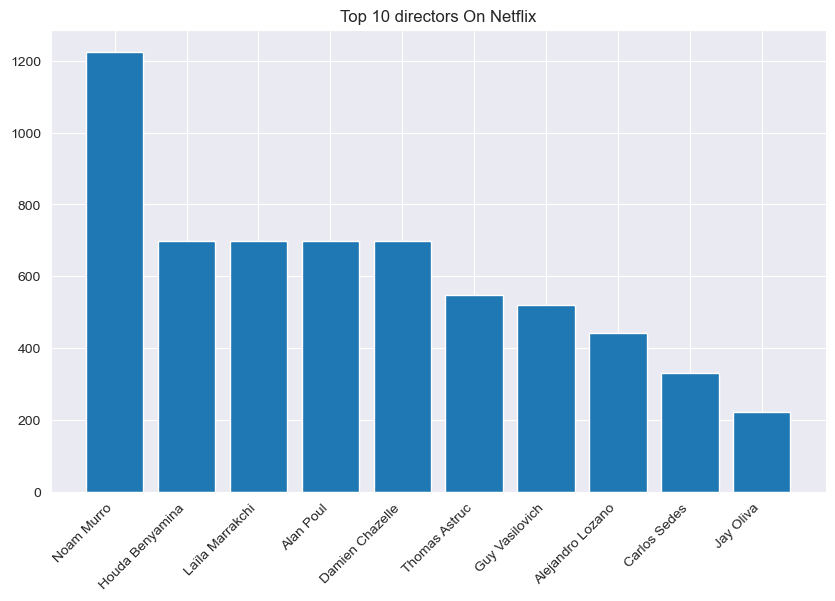

In [122]:

plt.figure(figsize =(10,6))

plt.bar(d1["director_y"],d1["title"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 directors On Netflix")


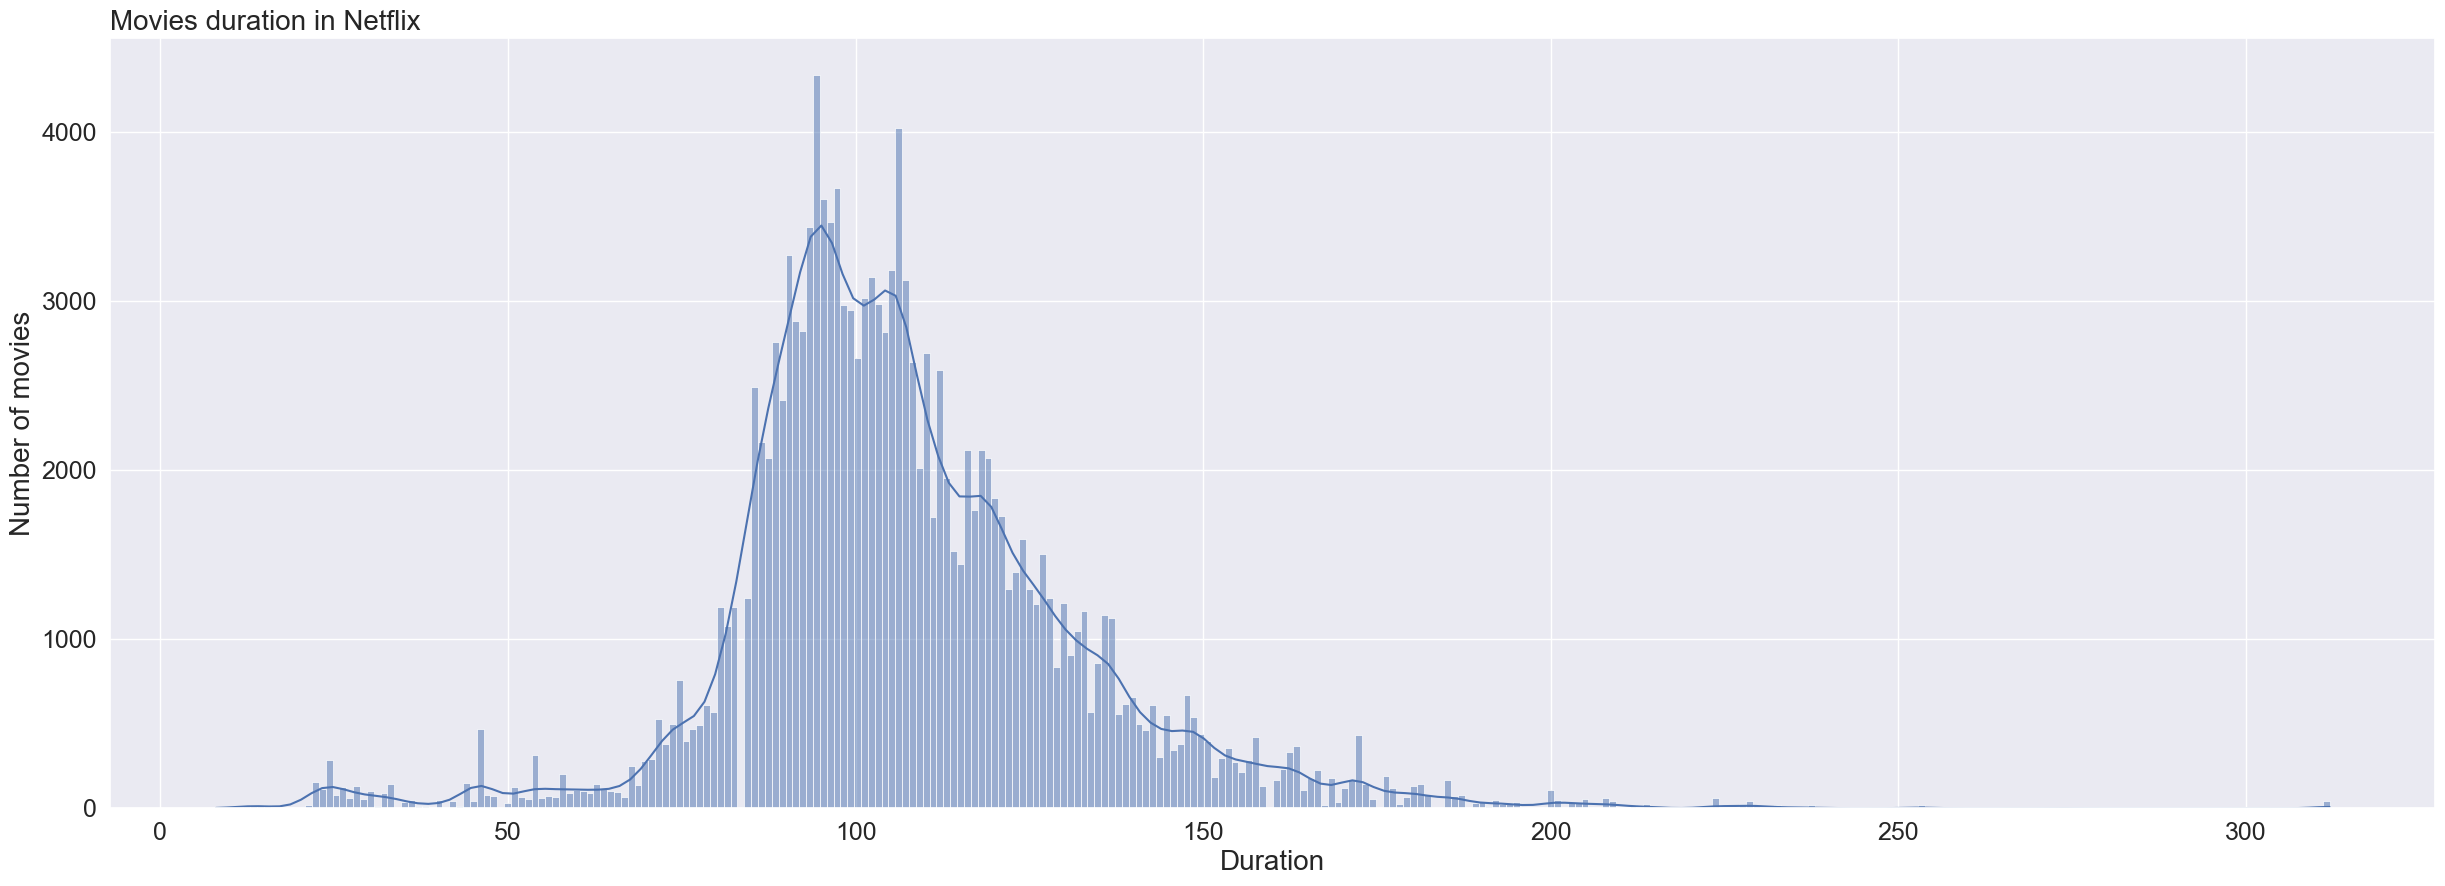

In [123]:
df_movies = df_final.loc[df_final['type'] == 'Movie']
plt.figure(figsize=(30, 10))
sns.set(style='darkgrid')
sns.histplot(data=df_movies['duration'], kde=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Movies duration in Netflix', fontsize=20, loc='left')
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.show()

In [124]:
data=df_final.groupby("listed_in_y")["title"].nunique()
data=data.reset_index()


In [125]:
data.sort_values(by='title', ascending=False,inplace=True)

In [126]:
d1=data.head(10)
d1

,listed_in_y,title
16,International Movies,2574
12,Dramas,2416
7,Comedies,1662
17,International TV Shows,1242
0,Action & Adventure,853
34,TV Dramas,757
15,Independent Movies,753
24,Romantic Movies,609
4,Children & Family Movies,608
41,Thrillers,577


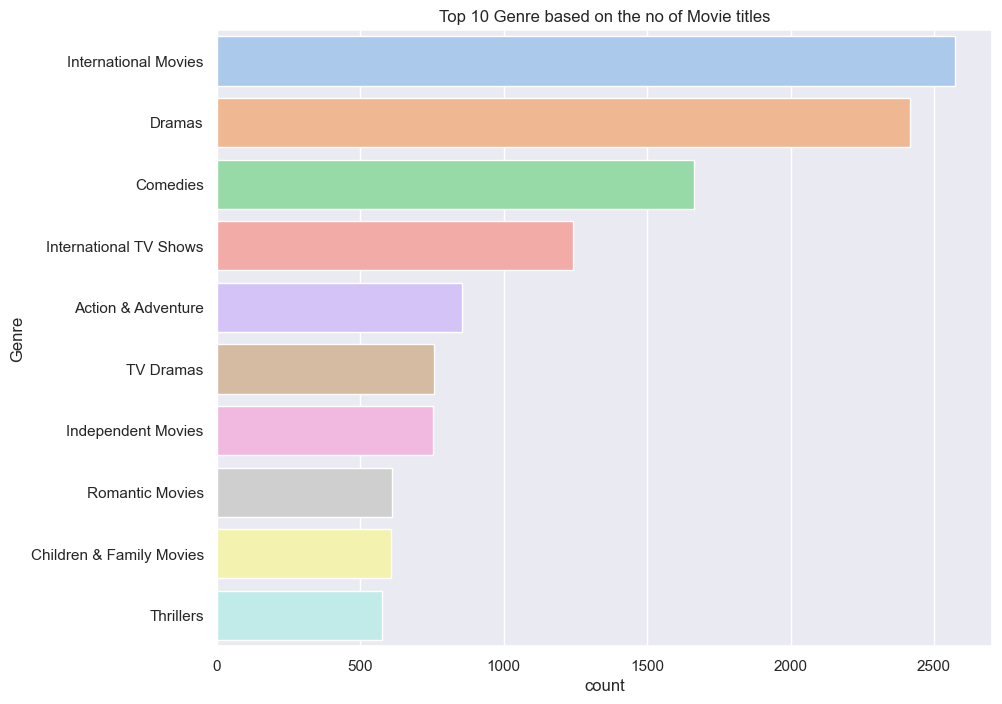

In [127]:
plt.figure(figsize=(10, 8))
plt.title("Top 10 Genre based on the no of Movie titles")
sns.barplot(y = "listed_in_y",x="title",data=d1, palette="pastel")
plt.ylabel("Genre")
plt.xlabel("count")

plt.show()

In [128]:
data=df_final.groupby("cast_y")["title"].nunique()
data=data.reset_index()


In [129]:
data.sort_values(by='title', ascending=False,inplace=True)

In [130]:
d1=data.head(10)
d1

,cast_y,title
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
32591,Takahiro Sakurai,32
24215,Naseeruddin Shah,32
28974,Rupa Bhimani,31
25424,Om Puri,30
845,Akshay Kumar,30
35880,Yuki Kaji,29
1773,Amitabh Bachchan,28


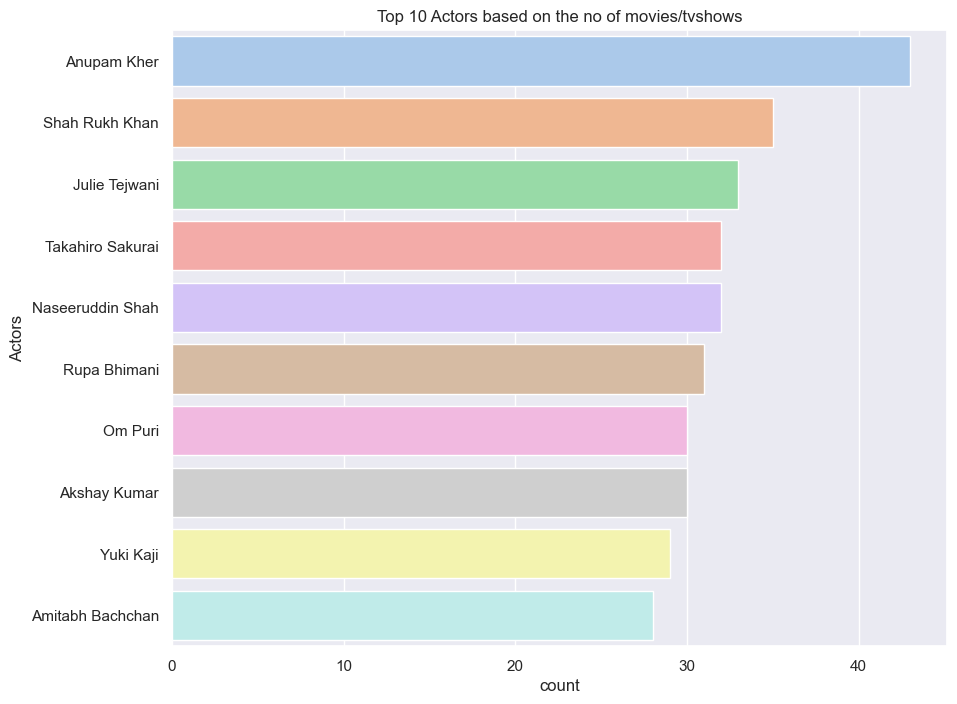

In [131]:
plt.figure(figsize=(10, 8))
plt.title("Top 10 Genre based on the no of Movie titles")
sns.barplot(y = "cast_y",x="title",data=d1, palette="pastel")
plt.ylabel("Actors")
plt.xlabel("count")
plt.title("Top 10 Actors based on the no of movies/tvshows")
plt.show()

In [133]:
df_final["year_added"] = df_final['date_added'].dt.year
df_final

,show_id,type,title,date_added,release_year,rating,duration,description,country_y,listed_in_y,cast_y,director_y,year_added
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Noam Murro,2021
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Damien Chazelle,2021
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Houda Benyamina,2021
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Laïla Marrakchi,2021
5,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",South Africa,International TV Shows,Ama Qamata,Alan Poul,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335343,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Manish Chaudhary,Mozez Singh,2019
335344,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Meghna Malik,Mozez Singh,2019
335345,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Malkeet Rauni,Mozez Singh,2019
335346,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,India,Music & Musicals,Anita Shabdish,Mozez Singh,2019


Text(0.5, 1.0, 'Movies and TV Shows added added to Netflix by date ')

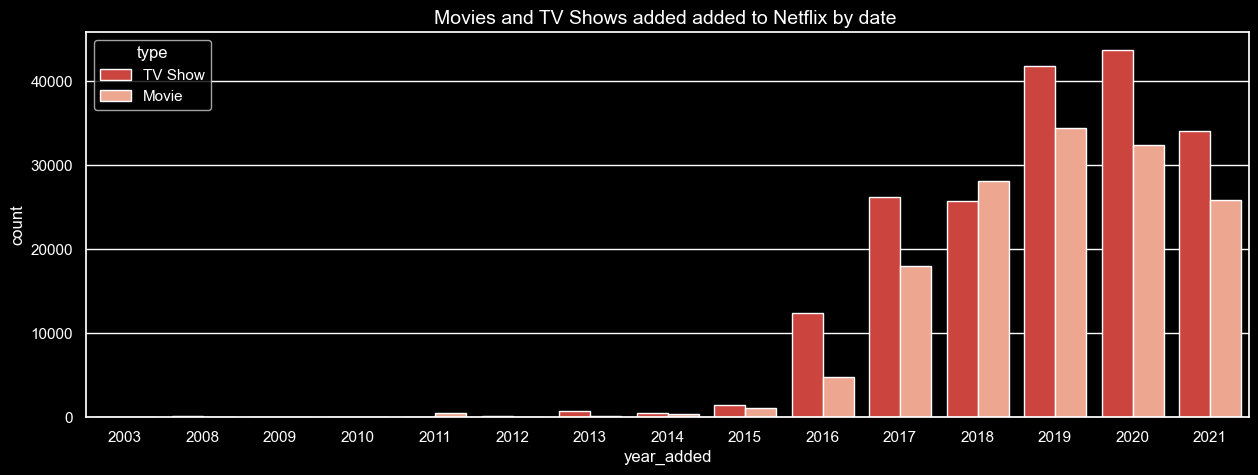

In [135]:
fig = plt.figure(figsize = (15,5))

plt.style.use('dark_background')
sns.countplot(data = df_final,x = 'year_added',hue = 'type',palette ="Reds_r")
plt.title('Movies and TV Shows added added to Netflix by date ', fontsize=14)

(2000.0, 2022.0)

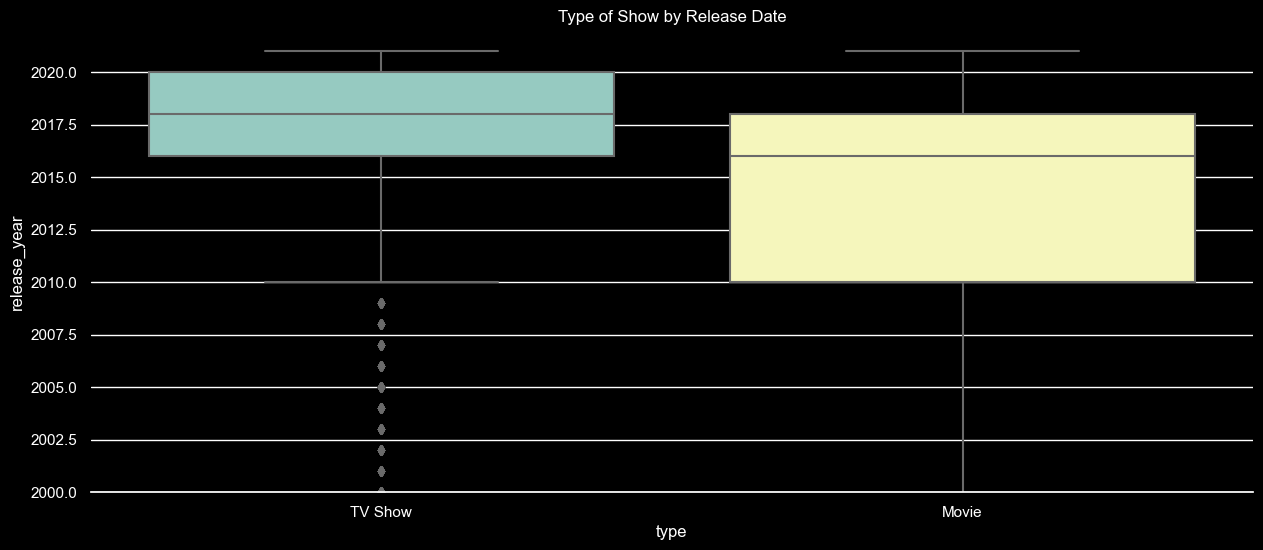

In [145]:
plt.figure(figsize=(15,6))
sns.boxplot(x='type', y='release_year', data=df_final )
sns.despine(left=True)
plt.title('Type of Show by Release Date')
plt.ylim(2000,2022)

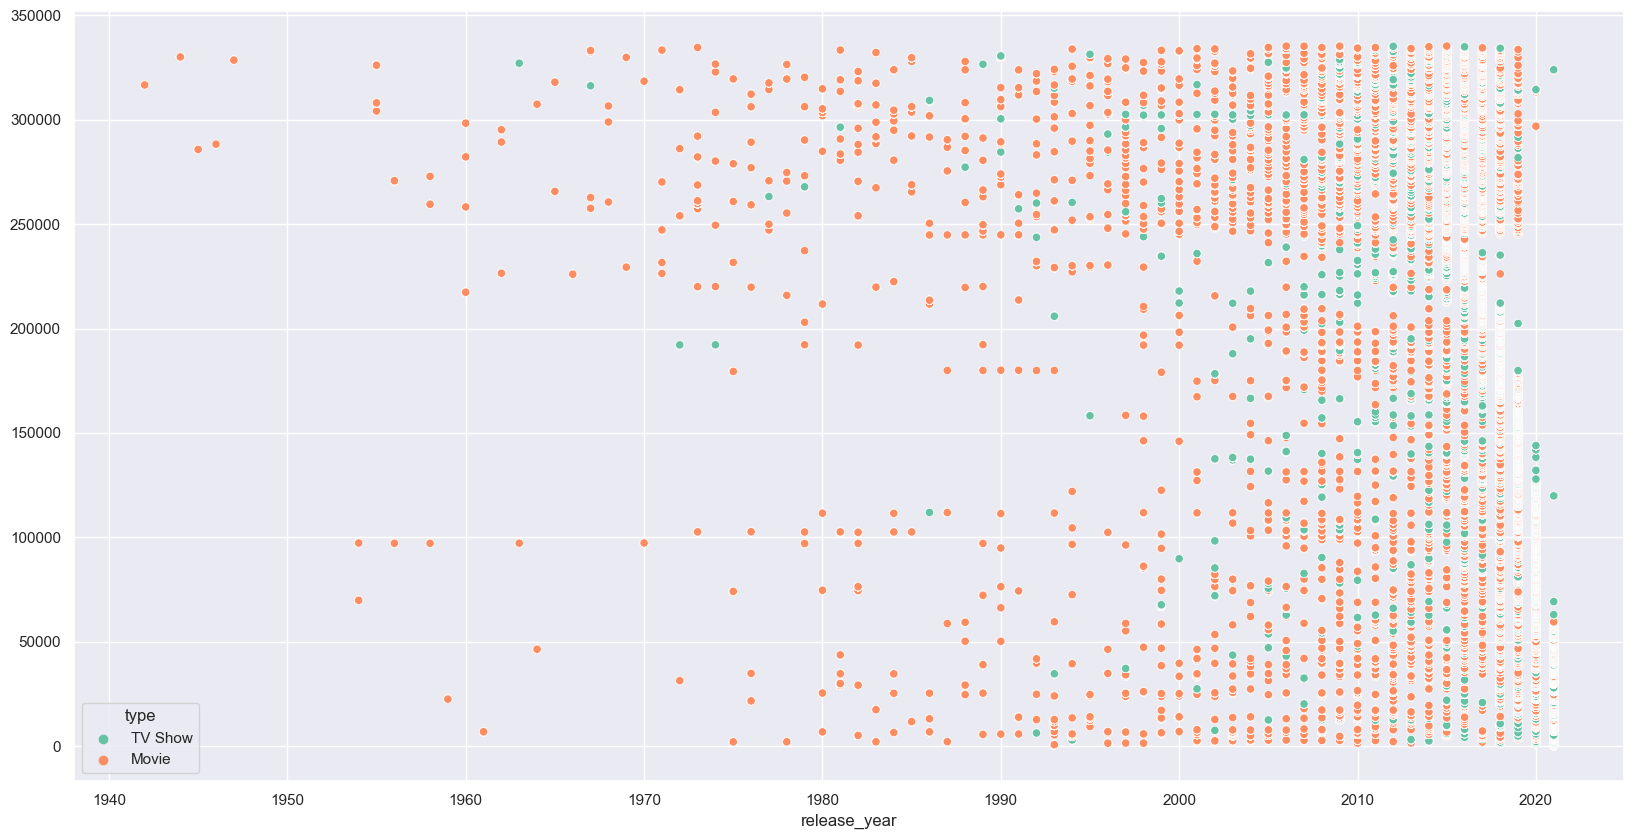

In [155]:
plt.figure(figsize = (20,10))
d=sns.scatterplot(y = df_final.index , x = df_final.release_year , hue = df_final.type , palette='Set2')

# Business Insights

1. United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared  to TV Shows.

2. Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

3. Over the years both TV shows and movie contents addtion has increased till 2020, but after 2020 its started declining may be due to Covid relief, number of Movies added is more compare to TV shows over the years

4. Noam Murro, Houda Benyamina and Laïla Marrakchi	 are the most popular directors across Netflix

5. Anupam Kher,SRK,Julie Tejwani,Takahiro Sakurai, Naseeruddin Shah and Takahiro Sakurai occupy the top stop as actors that appeared maximum number of times in Movies/shows.

6. Netflix is more focussing on movies compare to TV shows

7. International Movies, Dramas and Comedies are the most popular are most popular Genre

8. Most of the highly rated content on Netflix is intended for Mature Audiences

9. Normally the duration of  movies in our whole data is 100 mins.

10. There   are outliers in TV Shows because   great number of TV Shows had started releasing from 2016 only. 

11. TV Shows have more number of actors and directors involved compared to movies. 
  

 


# Recommendations

1. We can  cearly see currently Netflix has more presense in popular countries only  like  United States ,India, UK, 
   Japan ,South korea  etc  as compare to other countries.

2. Netflix should plan to expand in other countries by adding both  country specific content and International content
   platform.
 
3. Drama, Comedy and International TV Shows/Movies are the most popular Genres across the countries for both TV Shows and     t    Movies , so recommended to generate more content on these genres.

4. Netflix should not just focus on mature audience as there is lot of content for mature audience. They should start making       more content for audience under 17 years.

5. While creating content, take into consideration the popular actors/directors for that country. Also take into account the      director-actor combination which is highly recommended.

6. For audience 90-110 mins is the recommended length for movies.






